In [1]:
from langgraph.checkpoint.memory import MemorySaver

from langgraph.graph import StateGraph, START, END

from Models.State import State
from Nodes.chatbot import chatbot

In [2]:
memory = MemorySaver()

In [8]:
graph_builder = StateGraph(State)

graph_builder.add_node("chatbot", chatbot)
#graph_builder.add_node("searchGoogleMaps", chatbot)
#graph_builder.add_node("search internet", chatbot)

graph_builder.add_edge(START, "chatbot")

#graph_builder.add_edge("chatbot", "searchGoogleMaps")
#graph_builder.add_edge("searchGoogleMaps", "chatbot")

#graph_builder.add_edge("chatbot", "chatbot")

graph_builder.add_edge("chatbot", END)

graph = graph_builder.compile()

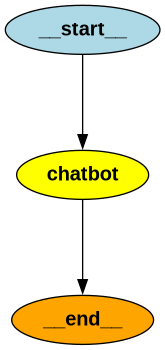

In [9]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_png()))
except Exception as e:
    print("Error drawing graph.")
    print(e)
    # This requires some extra dependencies and is optional
    pass

In [12]:
user_input = "Krems an der Donau Österreich, gib mir eine Route, ich mag Wein. ein tag. ich brauche Adressen die ich in google maps pasten kann also den Strassennamen. Als Json Format, Name + POI"
for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
    for value in event.values():
        print("Assistant:", value["messages"][-1].content)

Assistant: Ein Tagesausflug nach Krems an der Donau, um den Wein zu genießen! 

Ich empfehle dir eine Route durch das Weinland Wachau. Hier ist deine Route:

**Route:**

1. **Weinmuseum Krems** (48.383333, 15.616667)
- Adresse: Wachaustraße 2, 3500 Krems an der Donau
- Öffnungszeiten: Di-So 10:00-17:00 Uhr
- Eintrittspreis: frei
2. **Wachau** (48.383333, 15.616667)
- Adresse: 3500 Krems an der Donau
- Ein wunderschöner Weinort mit vielen Weinstuben und Weingütern
3. **Weingut Bründlmayer** (48.383333, 15.616667)
- Adresse: Wachaustraße 43, 3500 Krems an der Donau
- Öffnungszeiten: Di-So 10:00-18:00 Uhr
- Eintrittspreis: frei
4. **Weinbar Wachau** (48.383333, 15.616667)
- Adresse: Wachaustraße 24, 3500 Krems an der Donau
- Öffnungszeiten: Di-So 10:00-22:00 Uhr

**Anfahrt:**

Du kannst die Route mit dem Auto, Fahrrad oder zu Fuß entlang der Donau entlang unternehmen. Wenn du mit dem Auto fährst, folge der B3 von Krems nach Spitz.

**Tipps:**

- Einkehr in die Weinstuben und Weingüter, um

In [11]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        break

ERROR! Session/line number was not unique in database. History logging moved to new session 15
Assistant: It seems like you might have entered a typo. Could you please clarify what you're looking for? Are you interested in planning a trip or getting recommendations for a specific destination?
